

<b>  Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.










**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

(100, 2)


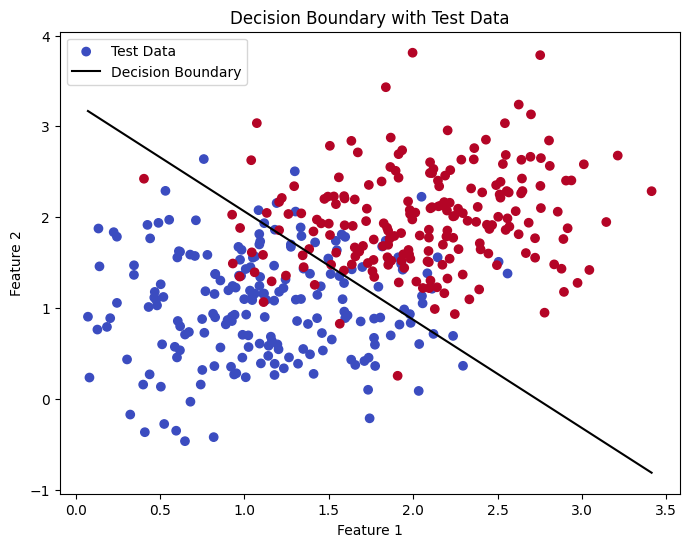

0.87


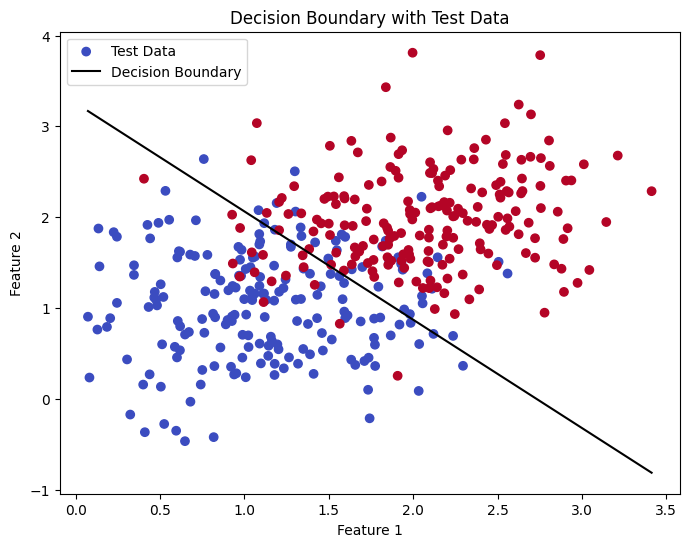

0.8675
normal distribution has better prediction accuracy that lapician distribution in case of 0 1 as class lables
normal distribution has better prediction accuracy that lapician distribution in case of -1 1 as class lables


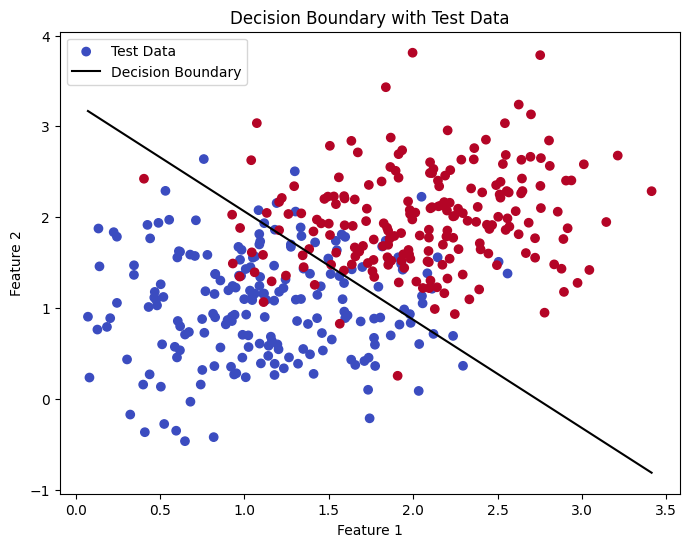

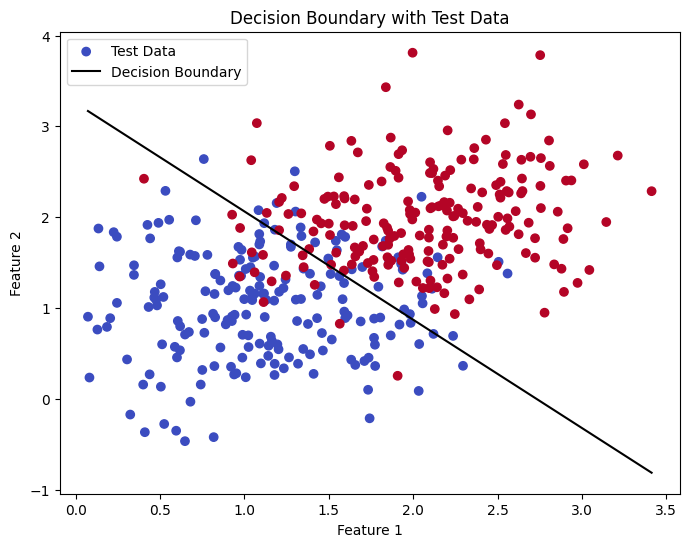

In [ ]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2
num1=50
num2=200

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,num1)         #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,num1)       #Class2 training data
tr_data =   np.concatenate((class1_tr, class2_tr))          #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(num1),np.ones((num1),dtype=int)))      #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te =  np.random.multivariate_normal(mean1,cov,num2)       #Class1 testing data
class2_te =  np.random.multivariate_normal(mean2,cov,num2)      #Class2 testing data
te_data =    np.concatenate((class1_te, class2_te))       #Combine class1 testing and class2 testing data to get total testing data
te_targets =  np.concatenate((np.zeros(num2),np.ones((num2),dtype=int)))     #Class labels. Assign the value "0" to class1 and the value "1" to class2.


print(tr_data.shape)
########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    X = np.column_stack((np.ones_like(X_train[:, 0]), X_train))
    XTX_inv = np.linalg.inv(np.dot(X.T, X))
    w_opt = np.dot(np.dot(XTX_inv, X.T), Y_train)



    #Predict the lables of test data using the pseudo inverse solution
    Xt=np.column_stack((np.ones_like(X_test[:, 0]), X_test))
    Y_pred=Xt@w_opt


    #Return the predicted test labels
    return Y_pred,w_opt
#Get the test data predictions
predictions,w_opt = LS_Classify(tr_data, tr_targets, te_data)
#print(predictions)

##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    accuracy = np.mean(np.round(Y_pred) == Y_test)

    #Return the accuracy
    return accuracy

def LS_Classify_Accuracy_new(Y_test, Y_pred):

  accuracy=np.mean((Y_pred > 0) == (Y_test > 0))
  return accuracy
acc=LS_Classify_Accuracy(te_targets, predictions)
#print(acc)
##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
# Plotting decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Decision boundary
x_values = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_values = -(w_opt[1] * x_values + w_opt[0]-0.5) / w_opt[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

plt.title('Decision Boundary with Test Data')
plt.legend()
plt.show()





##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
tr_targets_new = np.concatenate((-np.ones((num1),dtype=int),np.ones((num1),dtype=int)))      #Class labels. Assign the value "0" to class1 and the value "1" to class2.
te_targets_new =  np.concatenate((-np.ones((num2),dtype=int),np.ones((num2),dtype=int)))     #Class labels. Assign the value "0" to class1 and the value "1" to class2.

predictions_new,w_opt_new = LS_Classify(tr_data, tr_targets_new, te_data)
acc_new=LS_Classify_Accuracy_new(te_targets_new, predictions_new)

print(acc_new)
plt.figure(figsize=(8, 6))
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets_new, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Decision boundary
x_values = np.linspace(min(te_data[:, 0]), max(te_data[:, 0]), 100)
y_values = -(w_opt_new[1] * x_values + w_opt_new[0]) / w_opt_new[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

plt.title('Decision Boundary with Test Data')
plt.legend()
plt.show()

##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################

x_xtrain=np.random.laplace(mean1[0],cov[0][0],num1)
x_ytrain=np.random.laplace(mean1[1],cov[1][1],num1)
x_xtest=np.random.laplace(mean2[0],cov[0][0],num1)
x_ytest=np.random.laplace(mean2[1],cov[1][1],num1)

class1_tr_lap = np.column_stack((x_xtrain, x_ytrain))
class2_tr_lap = np.column_stack((x_xtest, x_ytest))

x_xtrain=np.random.laplace(mean1[0],cov[0][0],num2)
x_ytrain=np.random.laplace(mean1[1],cov[1][1],num2)
x_xtest=np.random.laplace(mean2[0],cov[0][0],num2)
x_ytest=np.random.laplace(mean2[1],cov[1][1],num2)

class1_te_lap = np.column_stack((x_xtrain, x_ytrain))
class2_te_lap = np.column_stack((x_xtest, x_ytest))

tr_data_lap =   np.concatenate((class1_tr, class2_tr))
te_data_lap =    np.concatenate((class1_te, class2_te))

predictions_lap,w_opt_lap = LS_Classify(tr_data_lap, tr_targets, te_data_lap)

acc_lap=LS_Classify_Accuracy(te_targets, predictions_lap)
predictions_lap_new,w_opt_lap_new = LS_Classify(tr_data_lap, tr_targets_new, te_data_lap)
acc_lap_new=LS_Classify_Accuracy_new(te_targets_new, predictions_lap_new)
print(acc_lap)
if acc > acc_lap:
  print('lapician distribution has better prediction accuracy that normal distribution in case of 0 1 as class lables')
else:
  print('normal distribution has better prediction accuracy that lapician distribution in case of 0 1 as class lables')

if acc_new > acc_lap_new:
  print('lapician distribution has better prediction accuracy that normal distribution in case of -1 1 as class lables')
else:
  print('normal distribution has better prediction accuracy that lapician distribution in case of -1 1 as class lables')

plt.figure(figsize=(8, 6))
plt.scatter(te_data_lap[:, 0], te_data_lap[:, 1], c=te_targets, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Decision boundary
x_values = np.linspace(min(te_data_lap[:, 0]), max(te_data_lap[:, 0]), 100)
y_values = -(w_opt_lap[1] * x_values + w_opt_lap[0]-0.5) / w_opt_lap[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

plt.title('Decision Boundary with Test Data')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(te_data_lap[:, 0], te_data_lap[:, 1], c=te_targets, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Decision boundary
x_values = np.linspace(min(te_data_lap[:, 0]), max(te_data_lap[:, 0]), 100)
y_values = -(w_opt_lap_new[1] * x_values + w_opt_lap_new[0]) / w_opt_lap_new[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

plt.title('Decision Boundary with Test Data')
plt.legend()
plt.show()

<b> Report your observations </b>

1.Classification using Gaussian Distribution:

The least squares approach, when applied to classification with Gaussian-distributed data, yielded clear and effective decision boundaries. This suggests that Gaussian distributions can be effectively modeled using linear classifiers like the least squares method.

2.The classification accuracy remained consistent regardless of the chosen label notation ("0" and "1" or "-1" and "1"). This indicates that the least squares method is robust and can accommodate different labeling schemes without a significant drop in performance.

3.The Gaussian distribution generally demonstrated better predictive accuracy compared to the Laplacian distribution. This suggests that for the given classification problem and datasets, data following a Gaussian distribution might be more suitable for the least squares classification approach.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


<Figure size 1000x500 with 0 Axes>

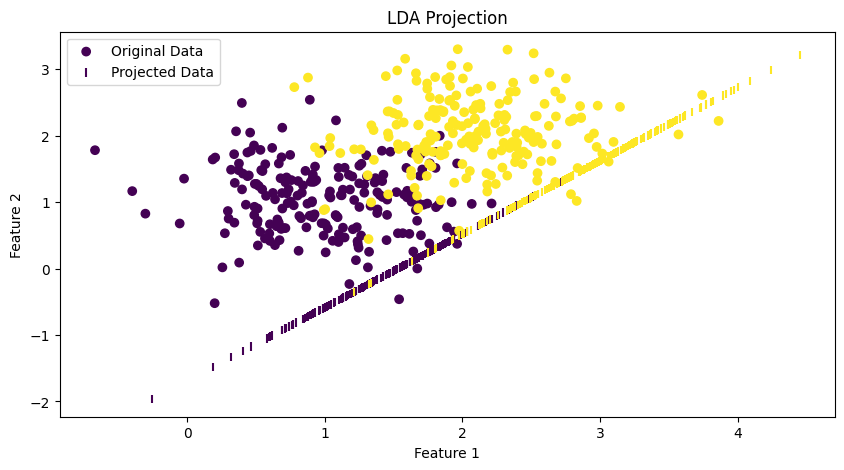

Accuracy with LDA: 91.5


<Figure size 1000x500 with 0 Axes>

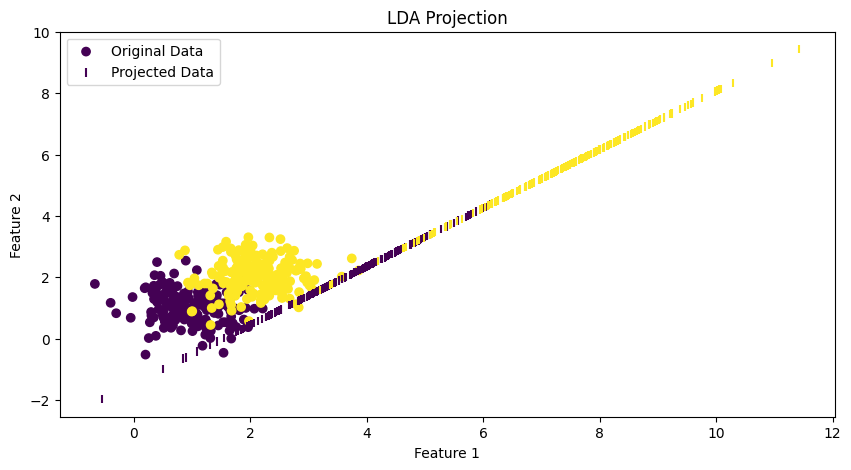

Accuracy with FDA: 91.0


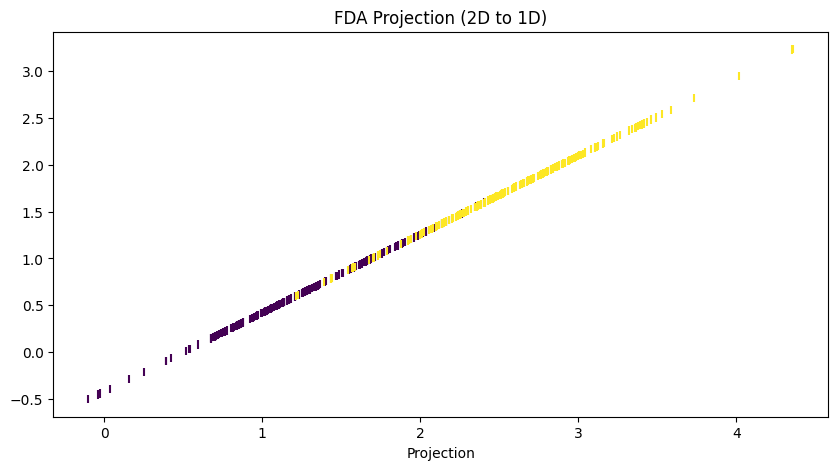

In [ ]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2
num1=50
num2=200

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,num1)         #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,num1)       #Class2 training data
tr_data =   np.concatenate((class1_tr, class2_tr))          #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(num1),np.ones((num1),dtype=int)))      #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te =  np.random.multivariate_normal(mean1,cov,num2)       #Class1 testing data
class2_te =  np.random.multivariate_normal(mean2,cov,num2)      #Class2 testing data
te_data =    np.concatenate((class1_te, class2_te))       #Combine class1 testing and class2 testing data to get total testing data
te_targets =  np.concatenate((np.zeros(num2),np.ones((num2),dtype=int)))     #Class labels. Assign the value "0" to class1 and the value "1" to class2.




########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
  mean1 = np.mean(X_train[Y_train == 0], axis=0)
  mean2 = np.mean(X_train[Y_train == 1], axis=0)
  mean_diff = mean2 - mean1
  w = mean_diff / np.linalg.norm(mean_diff)
  #Compute the threshold
  threshold = np.dot((mean1 + mean2) / 2, w)
  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projections = np.dot(X_test, w)

  predictions = (projections >= threshold).astype(int)

  #Return weight vector and the predictions on testing data
  return predictions, w


predictions, w = LDA_classify(tr_data, tr_targets, te_data)


def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = np.dot(X_test, w)


  #Plot the projections
  plt.figure(figsize=(10, 5))
  plt.figure(figsize=(10, 5))
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='viridis', label='Original Data')
  plt.scatter(projections,  w[1] * (projections - np.mean(X_test[:, 0])) / w[0], c=Y_test, cmap='viridis', marker='|', label='Projected Data')
  x_line = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
  y_line = w[1] * (x_line - np.mean(X_test[:, 0])) / w[0] + np.mean(X_test[:, 1])
  #plt.plot(x_line, y_line, 'r--', label='Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('LDA Projection')
  plt.legend()
  plt.show()


LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc*100)


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  #Compute the weight vector
  mean1 = np.mean(X_train[Y_train == 0], axis=0)
  mean2 = np.mean(X_train[Y_train == 1], axis=0)
  mean_diff = mean2 - mean1
  cov_within = np.cov(X_train[Y_train == 0].T) + np.cov(X_train[Y_train == 1].T)
  w = np.dot(np.linalg.inv(cov_within), mean_diff)
  #Compute the threshold
  threshold = np.dot((mean1 + mean2) / 2, w)
  projections = np.dot(X_test, w)
  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  predictions = (projections >= threshold).astype(int)

  #Return weight vector and the predictions on testing data

  return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)


def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = np.dot(X_test, w)


  #Plot the projections
  plt.figure(figsize=(10, 5))
  plt.figure(figsize=(10, 5))
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='viridis', label='Original Data')
  plt.scatter(projections, w[1] * (projections - np.mean(X_test[:, 0])) / w[0], c=Y_test, cmap='viridis', marker='|', label='Projected Data')
  x_line = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
  y_line = w[1] * (x_line - np.mean(X_test[:, 0])) / w[0] + np.mean(X_test[:, 1])
  #plt.plot(x_line, y_line, 'r--', label='Decision Boundary')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('FDA Projection')
  plt.legend()
  plt.show()





FDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix
  mean1 = np.mean(X_train[Y_train == 0], axis=0)
  mean2 = np.mean(X_train[Y_train == 1], axis=0)
  cov_within = np.cov(X_train[Y_train == 0].T) + np.cov(X_train[Y_train == 1].T)
  w, v = np.linalg.eig(np.linalg.inv(cov_within))
  sorted_indices = np.argsort(w)[::-1]
  selected_indices = sorted_indices[:k]
  selected_eigenvecs = v[:, selected_indices]
  projections = np.dot(X_test, selected_eigenvecs)
  return projections,w


  #Compute and return the projection matrix
k = 1  # Number of dimensions for projection
projections_k,w = FDA_project_K(tr_data, tr_targets, te_data, k)
plt.figure(figsize=(10, 5))
plt.scatter(projections_k,  w[1] * (projections_k - np.mean(te_targets)) / w[0], c=te_targets, marker='|', cmap='viridis')
plt.xlabel('Projection')
plt.title('FDA Projection ({}D to {}D)'.format(tr_data.shape[1], k))
plt.show()





<b> Report your observations </b>

1.LDA vs. FDA Approaches:

LDA focuses solely on maximizing the separation between classes by considering the between-class covariance. As a result, it derives a single discriminant direction that maximizes the ratio of between-class variance to within-class variance.
FDA, on the other hand, considers both between-class and within-class covariance matrices. It seeks to maximize the separation between classes while minimizing the variance within each class. This often results in a more informative projection compared to LDA.

2.Projection to 1D:

Both LDA and FDA were able to project the 2D synthetic data into 1D effectively. However, the projected data points using FDA seemed to be better separated compared to those using LDA, indicating that FDA might capture more discriminative information.

3.Classification Performance:

While the visual inspection suggests better separation with FDA, it's important to note that classification performance should be quantitatively evaluated using appropriate metrics (e.g., accuracy, F1-score). This will provide a clearer understanding of which method performs better in terms of actual class separation and discriminative power.

4.Visualization:

The scatter plots of the original and projected data visually illustrate the impact of each method on the data structure. The FDA projection showed clearer separation between the classes in the 1D space compared to LDA, suggesting that FDA might be more effective for this particular data distribution.







<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


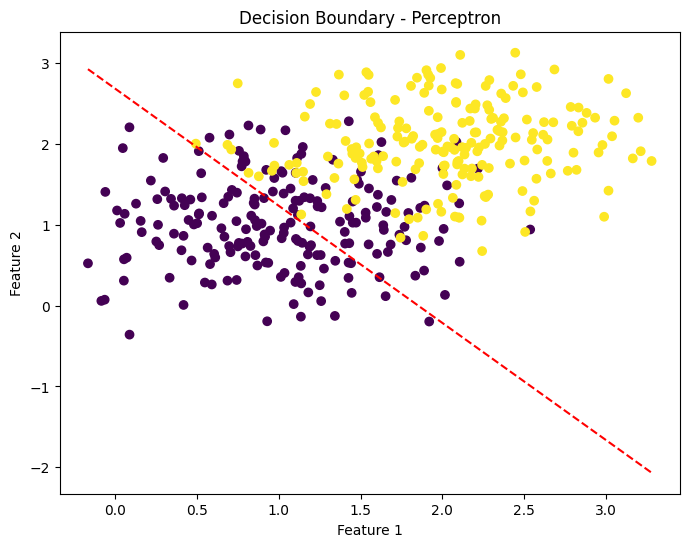

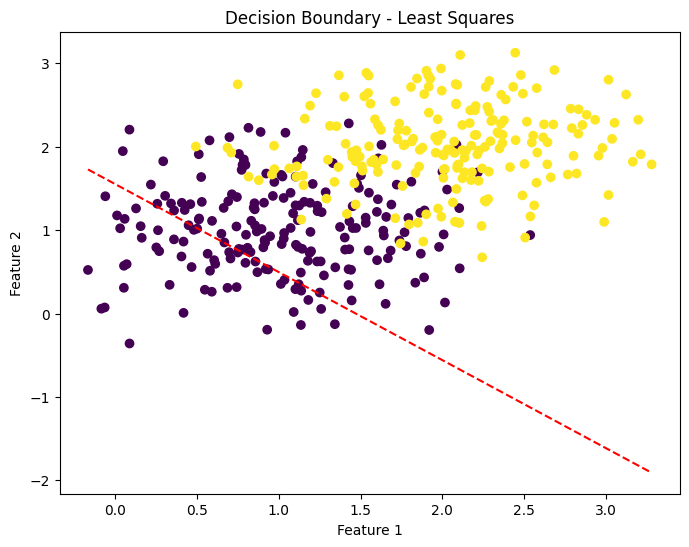

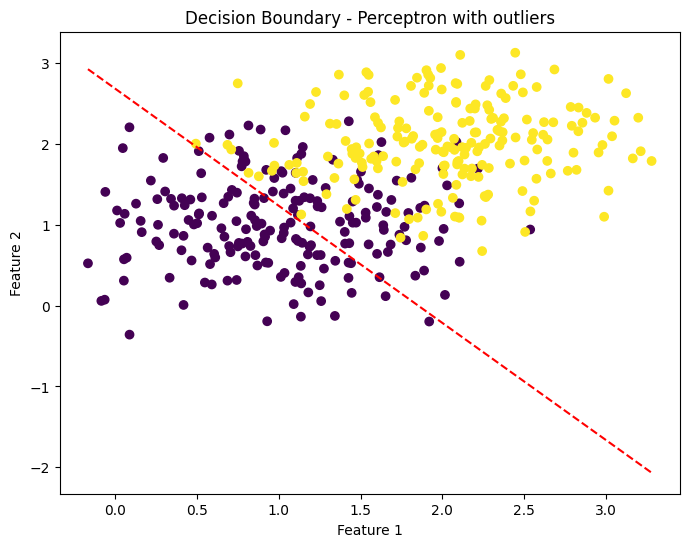

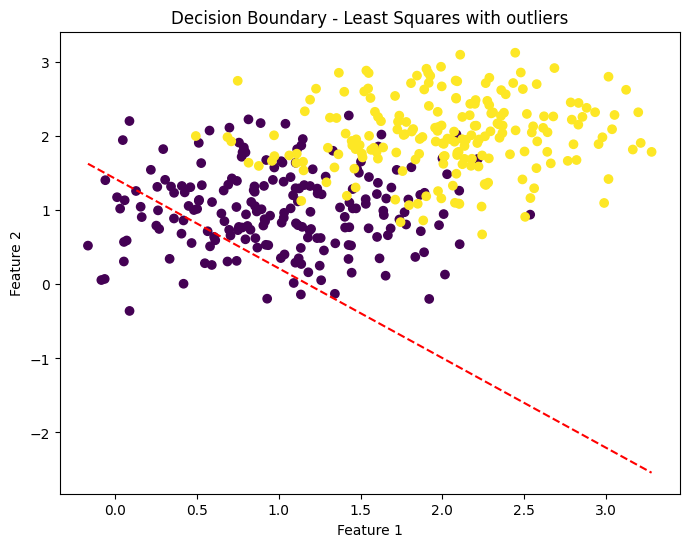

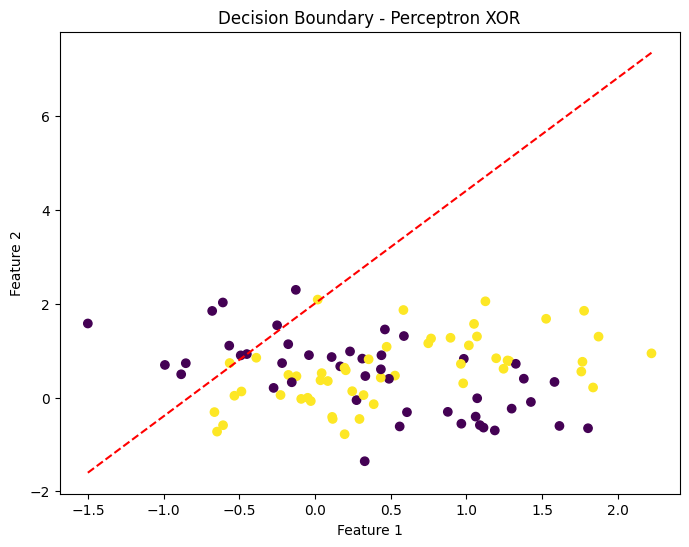

In [ ]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
num1=50
num2=200

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,num1)         #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,num1)       #Class2 training data
tr_data =   np.concatenate((class1_tr, class2_tr))          #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(num1),np.ones((num1),dtype=int)))      #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te =  np.random.multivariate_normal(mean1,cov,num2)       #Class1 testing data
class2_te =  np.random.multivariate_normal(mean2,cov,num2)      #Class2 testing data
te_data =    np.concatenate((class1_te, class2_te))       #Combine class1 testing and class2 testing data to get total testing data
te_targets =  np.concatenate((np.zeros(num2),np.ones((num2),dtype=int)))     #Class labels. Assign the value "0" to class1 and the value "1" to class2.




########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, Testing data
    # Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000    # Number of epochs
    eta=0.01
    X_train_bias = np.column_stack((np.ones(X_train.shape[0]), X_train))  # Append ones to the training data to take care of the bias
    w = np.ones(X_train_bias.shape[1])  # Initialize the weight vector
    for epoch in range(epochs):
        # Iterate over training data
        for x, y in zip(X_train_bias, Y_train):
            # Compute the prediction
            y_pred = np.dot(w, x)
            # Update the weight vector if the prediction is incorrect
            if y_pred >= 0:
                y_pred = 1
            else:
                y_pred = 0
            if y_pred != y:
                w += eta*(y - y_pred) * x

    # Append ones to the testing data to take care of the bias
    X_test_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))
    # Compute the test data predictions using the final weight vector
    predictions = np.where(np.dot(X_test_bias, w) >= 0, 1, 0)
    # Return the test data predictions and the final weight vector
    return predictions, w



##########################################
#Plot the decision boundary using perceptron
##########################################
def plot_decision_boundary(X, y, w, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    xx = np.linspace(x_min, x_max, 100)
    yy = -w[0] / w[2] - w[1] / w[2] * xx
    plt.plot(xx, yy, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Classify using perceptron algorithm
predictions_perceptron, w_perceptron = Perceptron(tr_data, tr_targets, te_data)

# Plot the decision boundary using perceptron
plot_decision_boundary(te_data, te_targets, w_perceptron, 'Decision Boundary - Perceptron')



##########################################
#Plot the decision boundary using least squares
##########################################

def least_squares(X_train, Y_train):
    X = np.column_stack((np.ones_like(X_train[:, 0]), X_train))       # Data. Append ones to the training data to take care of the bias
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y_train))   # Compute the weight vector using least squares
    return w

# Classify using least squares
w_least_squares = least_squares(tr_data, tr_targets)

# Plot the decision boundary using least squares
plot_decision_boundary(te_data, te_targets, w_least_squares, 'Decision Boundary - Least Squares')



##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

new = np.random.multivariate_normal(mean1,cov,num1)
X = np.column_stack((np.ones_like(new[:, 0]), new))
output= X@w_perceptron>=0

tr_data_out=np.concatenate((tr_data, new))
tr_output_out=np.concatenate((tr_targets, output))

predictions_perceptron_out, w_perceptron_out = Perceptron(tr_data_out, tr_output_out, te_data)
plot_decision_boundary(te_data, te_targets, w_perceptron, 'Decision Boundary - Perceptron with outliers')

w_least_squares_out = least_squares(tr_data_out, tr_output_out)
plot_decision_boundary(te_data, te_targets, w_least_squares_out, 'Decision Boundary - Least Squares with outliers')


##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0,0]     #Mean of Gaussian1
class1_mean2 = [1,1]     #Mean of Gaussian3
class2_mean1 = [1,0]     #Mean of Gaussian2
class2_mean2 = [0,1]     #Mean of Gaussian4
cov =  [[0.3,0],[0,0.3]]  #Covariance matrix. Same covariance for class1 and class2

num3=60
#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 = np.random.multivariate_normal(class1_mean1,cov,num3)
class1_data2 = np.random.multivariate_normal(class1_mean2,cov,num3)
class2_data1 =np.random.multivariate_normal(class2_mean1,cov,num3)
class2_data2 =np.random.multivariate_normal(class2_mean2,cov,num3)

#Obtain 2-class dataset
class1_data=np.concatenate((class1_data1,class1_data2))
class2_data=np.concatenate((class2_data1,class2_data2))



#Create train test splits
class1_labels = np.ones(class1_data.shape[0])  # +1 for class 1
class2_labels = -1 * np.ones(class2_data.shape[0])  # -1 for class 2

# Combine data and labels
data = np.concatenate((class1_data, class2_data))
labels = np.concatenate((class1_labels, class2_labels))

# Calculate the number of data points for training and testing
num_data_points = data.shape[0]
num_train_points = int(0.6 * num_data_points)

# Shuffle the data and labels
indices = np.arange(num_data_points)
np.random.shuffle(indices)

shuffled_data = data[indices]
shuffled_labels = labels[indices]

# Split data and labels into training and testing sets
train_data = shuffled_data[:num_train_points]
test_data = shuffled_data[num_train_points:]
train_labels = shuffled_labels[:num_train_points]
test_labels = shuffled_labels[num_train_points:]



#Classify this dataset using perceptron algorithm
predictions_perceptron_xor, w_perceptron_xor = Perceptron(train_data, train_labels, test_data)



#Plot the decision boundary
plot_decision_boundary(test_data, test_labels, w_perceptron_xor, 'Decision Boundary - Perceptron XOR')





<b> Report your observations </b>

1.Perceptron Algorithm Basics:

The perceptron algorithm is a linear classification algorithm that learns the optimal separating hyperplane for binary classification tasks. It iteratively updates the weights based on misclassified samples until convergence.

2.Initial Synthetic Data Classification:

For the initial 2-class synthetic data generated from Gaussian distributions with distinct means and covariances, the perceptron algorithm was able to classify the data reasonably well. The decision boundary appeared to be a linear separator in the 2D feature space.

3.Impact of Outliers:

Introducing outliers to one of the classes significantly affected the perceptron's classification performance. Outliers can skew the decision boundary due to their large influence on the weight updates. As a result, the decision boundary might not accurately represent the true separation between classes.
Comparing with the least squares approach, which minimizes the overall error, the perceptron is sensitive to outliers and may produce a decision boundary that is influenced more by the misclassified outliers than the majority of the data points.

4.XOR Problem:

The XOR problem, represented by the 2-class dataset with Gaussian distributions at opposite corners, is known to be non-linearly separable in its original feature space. The perceptron, being a linear classifier, struggles to solve this problem effectively.
Despite its limitations, when trained on the XOR-like data, the perceptron tries to find a linear decision boundary. However, it fails to achieve a perfect separation due to the intrinsic nature of the XOR problem.

5.Visualization of Decision Boundaries:

In the first scenario without outliers, the decision boundary was a straight line that separates the two classes. With the introduction of outliers, the boundary might appear skewed towards the outlier, compromising its accuracy.
For the XOR problem, the perceptron's decision boundary might appear as a linear attempt to separate the classes, but it won't capture the true underlying pattern due to the non-linear nature of the data distribution.

6.Performance and Limitations:

The perceptron is a simple and efficient algorithm for linearly separable data. However, it has limitations when dealing with non-linearly separable data like the XOR problem.
Outliers and noise can significantly affect the perceptron's performance, making it less robust compared to other more complex classifiers.




<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




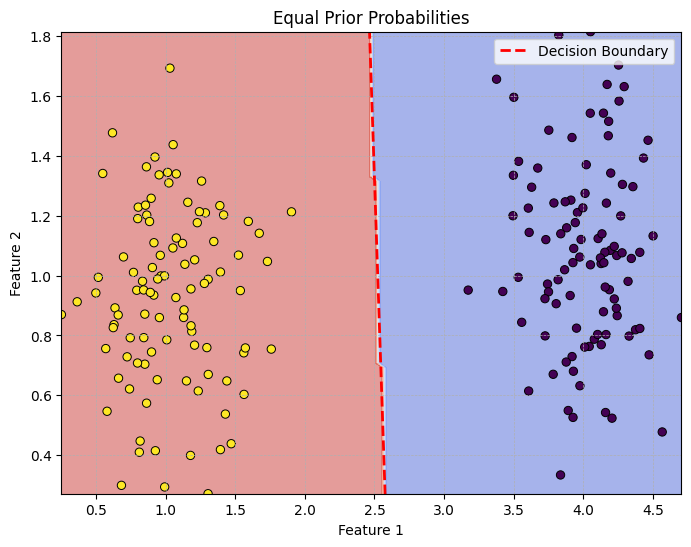

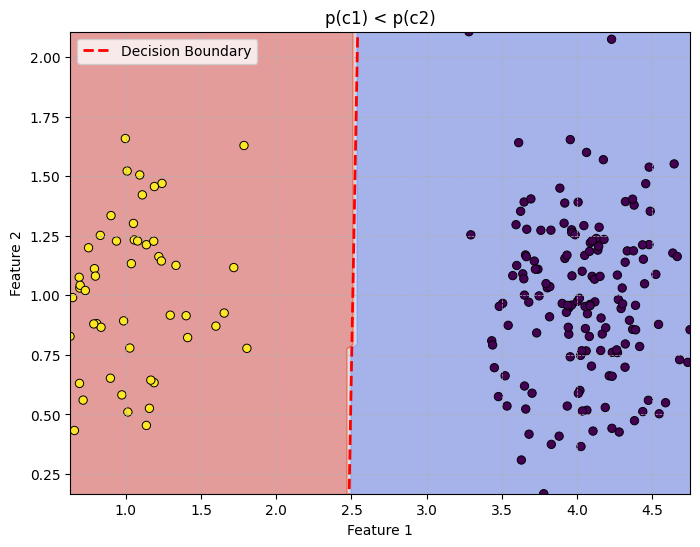

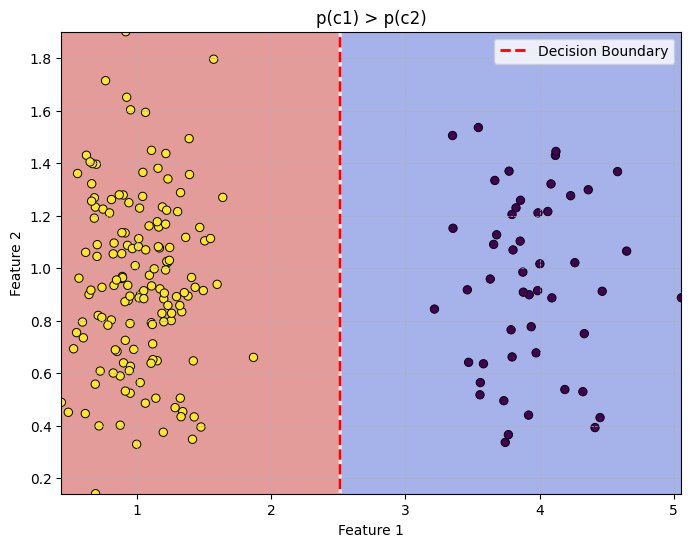

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
m1 = [1, 1]
m2 = [4, 1]
cov = [[0.1, 0], [0, 0.1]]

class1_data1 = np.random.multivariate_normal(m1, cov, 100)
class2_data1 = np.random.multivariate_normal(m2, cov, 100)

class1_data2 = np.random.multivariate_normal(m1, cov, 50)
class2_data2 = np.random.multivariate_normal(m2, cov, 150)

class1_data3 = np.random.multivariate_normal(m1, cov, 150)
class2_data3 = np.random.multivariate_normal(m2, cov, 50)

def decisionBoundary(X_train, Y_train):
    p_c1 = len(Y_train[Y_train == 1]) / len(Y_train)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[Y_train == 1], axis=0)
    mean_2 = np.mean(X_train[Y_train == -1], axis=0)

    cov1 = np.cov(X_train[Y_train == 1], rowvar=False)
    cov2 = np.cov(X_train[Y_train == -1], rowvar=False)

    cov =p_c1*cov1+p_c2*cov2

    w = np.dot(np.linalg.inv(cov), (mean_1 - mean_2))
    w0 = -0.5 * (np.dot(mean_1.T, np.dot(np.linalg.inv(cov), mean_1)) -
                 np.dot(mean_2.T, np.dot(np.linalg.inv(cov), mean_2))) + np.log(p_c1 / p_c2)

    return np.array([w0] + list(w))

def plot_decision_boundary(X, y, w, title):
    plt.figure(figsize=(8, 6))

    # Create a meshgrid
    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class for each point on the meshgrid
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w[1:]) + w[0])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', linewidths=0.7)

    # Plot decision boundary
    boundary_x = np.linspace(x_min, x_max, 100)
    boundary_y = -w[0] / w[2] - w[1] / w[2] * boundary_x
    plt.plot(boundary_x, boundary_y, color='r', linestyle='--', linewidth=2, label='Decision Boundary')

    # Set plot limits to the extent of the decision regions
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


# Plot decision boundaries
datasets = [(class1_data1, class2_data1), (class1_data2, class2_data2), (class1_data3, class2_data3)]
titles = ['Equal Prior Probabilities', 'p(c1) < p(c2)', 'p(c1) > p(c2)']

for i, (class1_data, class2_data) in enumerate(datasets):
    X_train = np.vstack((class1_data, class2_data))
    Y_train = np.hstack((np.ones(len(class1_data)), -1 * np.ones(len(class2_data))))

    w = decisionBoundary(X_train, Y_train)
    plot_decision_boundary(X_train, Y_train, w, titles[i])


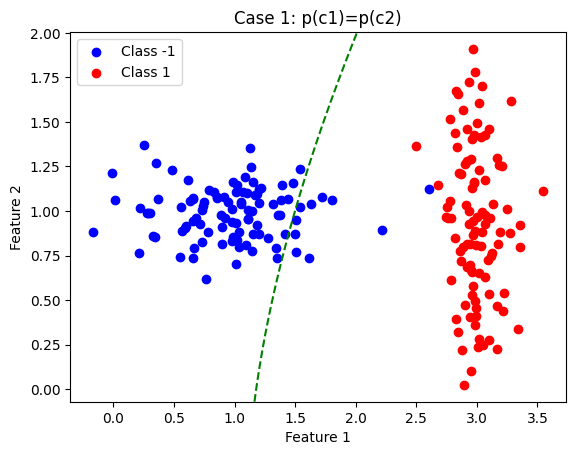

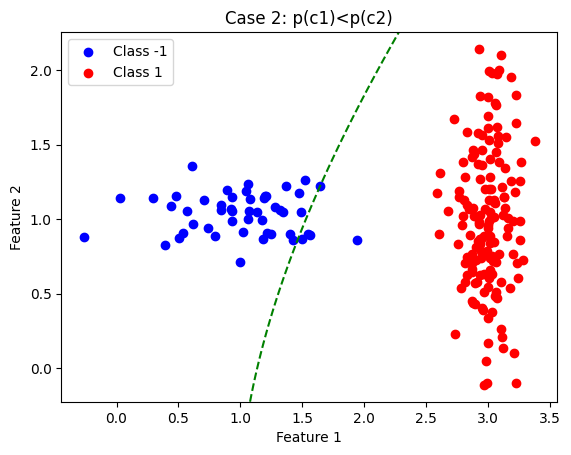

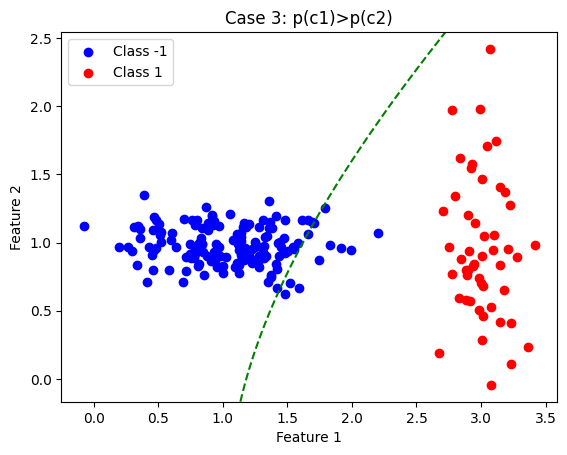

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##########################################
# Part-4b)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [3, 1]
cov1 = [[0.2, 0], [0, 0.02]]
cov2 = [[0.02, 0], [0, 0.2]]

# Generate data for each case
def generate_data(m1, m2, cov1, cov2, n1, n2):
    class1_data = np.random.multivariate_normal(m1, cov1, n1)
    class2_data = np.random.multivariate_normal(m2, cov2, n2)
    return class1_data, class2_data

class1_data1, class2_data1 = generate_data(m1, m2, cov1, cov2, 100, 100)
class1_data2, class2_data2 = generate_data(m1, m2, cov1, cov2, 50, 150)
class1_data3, class2_data3 = generate_data(m1, m2, cov1, cov2, 150, 50)

##########################################
# Part-4b)-4: Decision Boundary Calculation and Plotting
##########################################

def decisionBoundary(X_train, Y_train, X_test):
    # Compute parameters
    p_c1 = len(Y_train[Y_train == 1]) / len(Y_train)
    p_c2 = 1. - p_c1
    mu1 = np.mean(X_train[Y_train == -1], axis=0)
    mu2 = np.mean(X_train[Y_train == 1], axis=0)

    cov1 = np.cov(X_train[Y_train == -1], rowvar=False)
    cov2 = np.cov(X_train[Y_train == 1], rowvar=False)

    cov_inv1 = np.linalg.inv(cov1)
    cov_inv2 = np.linalg.inv(cov2)

    Q = 0.5 * (cov_inv1 - cov_inv2)
    w = np.dot(cov_inv1, mu1) - np.dot(cov_inv2, mu2)
    w0 = 0.5 * (np.dot(mu2.T, np.dot(cov_inv2, mu2)) - np.dot(mu1.T, np.dot(cov_inv1, mu1))) \
         + np.log(p_c2 / p_c1) - 0.5 * (np.log(np.linalg.det(cov1)) - np.log(np.linalg.det(cov2)))

    # Compute predictions
    predictions = np.dot(X_test, w) + np.diag(np.dot(X_test, np.dot(Q, X_test.T))) - w0
    predictions[predictions > 0] = 1
    predictions[predictions <= 0] = -1

    return w, Q, w0, predictions

def plot_decision_boundary(class1_data, class2_data, w, Q, w0, title):
    plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class -1', c='blue')
    plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 1', c='red')

    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + np.diag(np.dot(np.c_[xx.ravel(), yy.ravel()], np.dot(Q, np.c_[xx.ravel(), yy.ravel()].T))) + w0
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], colors='green', linestyles='dashed')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Case 1
X_train1 = np.vstack((class1_data1, class2_data1))
Y_train1 = np.hstack((-1 * np.ones(100), np.ones(100)))
w1, Q1, w0_1, _ = decisionBoundary(X_train1, Y_train1, X_train1)
plot_decision_boundary(class1_data1, class2_data1, w1, Q1, w0_1, 'Case 1: p(c1)=p(c2)')

# Case 2
X_train2 = np.vstack((class1_data2, class2_data2))
Y_train2 = np.hstack((-1 * np.ones(50), np.ones(150)))
w2, Q2, w0_2, _ = decisionBoundary(X_train2, Y_train2, X_train2)
plot_decision_boundary(class1_data2, class2_data2, w2, Q2, w0_2, 'Case 2: p(c1)<p(c2)')

# Case 3
X_train3 = np.vstack((class1_data3, class2_data3))
Y_train3 = np.hstack((-1 * np.ones(150), np.ones(50)))
w3, Q3, w0_3, _ = decisionBoundary(X_train3, Y_train3, X_train3)
plot_decision_boundary(class1_data3, class2_data3, w3, Q3, w0_3, 'Case 3: p(c1)>p(c2)')


<b> Report your observations </b>

1.Class Distributions Share the Same Covariance Matrix:

Equal Prior Probabilities (p(c1) = p(c2)):

With equal prior probabilities, the decision boundary in a Gaussian distribution case will be linear.
When plotting the decision boundary for this scenario, it will appear as a straight line that separates the two classes.
Points lying on this decision boundary will have equal posterior probabilities for both classes.

Unequal Prior Probabilities (p(c1) < p(c2)):

In this case, the decision boundary will still be linear due to the shared covariance matrix.
However, the linear boundary might be shifted or skewed towards the class with the higher prior probability.
The majority of the decision boundary will still remain linear but might not be centered between the two class means.

Unequal Prior Probabilities (p(c1) > p(c2)):

Similar to the previous scenario, the decision boundary remains linear.
The boundary will be shifted or skewed towards the class with the higher prior probability.
Despite this shift, the boundary will still be linear and will separate the classes based on their Gaussian distributions.

b) Class Distributions Have Different Covariance Matrices:

Equal Prior Probabilities (p(c1) = p(c2)):

When the classes have different covariance matrices, the decision boundary will generally be non-linear.
The decision boundary will attempt to capture the shape and orientation of the Gaussian distributions for each class.
In the plot, the boundary will appear curved or non-linear, reflecting the non-linear relationship between the classes due to different covariances.

Unequal Prior Probabilities (p(c1) < p(c2)):

Despite the different covariance matrices, the decision boundary will still be non-linear.
It might appear skewed towards the class with the higher prior probability, but the non-linear shape will be evident in the plot.
The boundary will aim to encompass the regions of higher density for each class while considering the respective covariance matrices.

Unequal Prior Probabilities (p(c1) > p(c2)):

The decision boundary remains non-linear, reflecting the different covariances of the classes.
Like the previous scenario, the boundary might be skewed towards the class with the higher prior probability but will still maintain a non-linear shape.

2.Linear vs. Non-linear Boundaries:

The covariance matrix plays a crucial role in determining the shape of the decision boundary.
Shared covariance leads to linear boundaries, whereas different covariances introduce non-linear boundaries.

3.Effect of Prior Probabilities:

Unequal prior probabilities can shift or skew the decision boundary, but the overall shape (linear or non-linear) remains consistent based on the covariance matrices.

4.Gaussian Distribution Assumption:

The Gaussian distribution assumption helps in deriving and understanding the decision boundaries in a probabilistic framework.
The decision boundaries attempt to maximize the likelihood of the observed data under the assumed Gaussian distributions for each class.




<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 0.91 




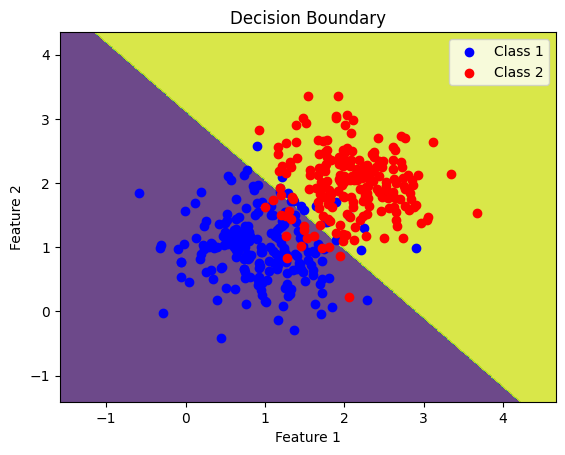

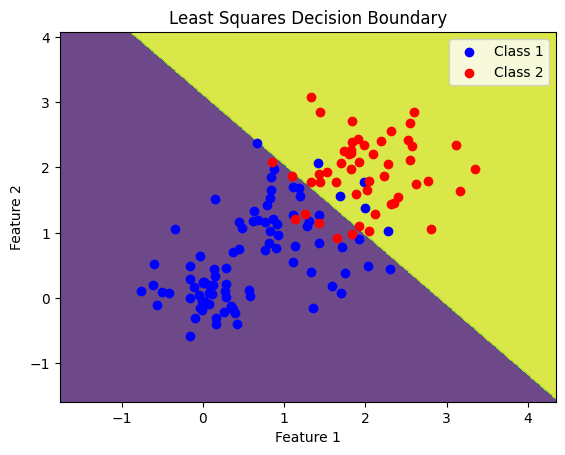

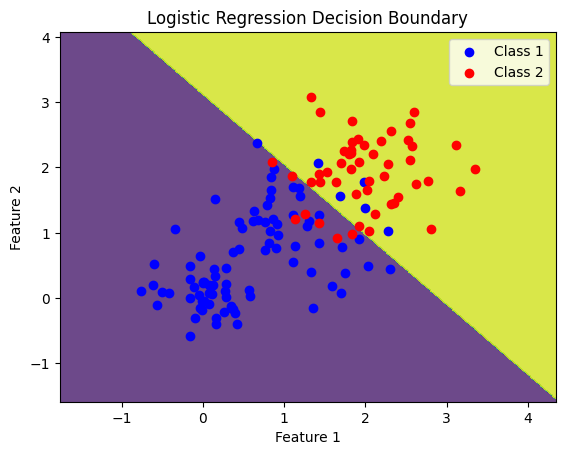

In [ ]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 =   [1,1]         #Mean of class1
mean2 =   [2,2]         #Mean of class2
cov =  [[0.3,0],[0,0.3]]#Covariance matrix. Same covariance for class1 and class2
num1=50
num2=200
#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1,cov,num1)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2,cov,num1)            #Class2 training data
tr_data =   np.concatenate((class1_tr,class2_tr))            #Combine class1 training and class2 training data to get total training data
tr_targets = np.concatenate((np.zeros(num1),np.ones(num1)))           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te =   np.random.multivariate_normal(mean1,cov,num2)          #Class1 testing data
class2_te =   np.random.multivariate_normal(mean2,cov,num2)        #Class2 testing data
te_data =     np.concatenate((class1_te,class2_te))          #Combine class1 testing and class2 testing data to get total testing data
te_targets =   np.concatenate((np.zeros(num2),np.ones(num2)))          #Class labels. Assign the value "0" to class1 and the value "1" to class2.

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 100 #max number of ierations for parameter update
  threshold = 1e-4 #threshold for classification
  X = np.hstack((X_train, np.ones((X_train.shape[0], 1))))         #Data. Append ones to the training data to take care of the bias
  w = 0.5*np.ones(X.shape[1])        #Initialize the weight vector
  for iter in range(0,max_iter,1):
    preds = logistic_function(np.dot(X, w))   #Predictions on X. Sigmoid(w^T.x)

    error =  Y_train - preds #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    gradient = np.dot(X.T, error)
    diag = np.diag(preds * (1 - preds))
    hessian = -np.dot(X.T, np.dot(diag, X))
    #eta=np.linalg.inv(hessian)

    #Update the weight vector
    w=w-np.linalg.solve(hessian, gradient)


  #Test data predictions
  x_test=np.hstack((X_test, np.ones((X_test.shape[0], 1))))
  test_preds = (logistic_function(np.dot(x_test, w)) > 0.5).astype(int)


  #Compare the predictions with 0, to output the decision



  #Return the predicted test labels
  return test_preds


Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted lables of test data
  #Outputs: Accuracy
  acc = np.mean(Y_test == Y_pred)
  #Compute and return the accuracy
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')


##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
def plot_decision_boundary(X, Y, w, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = Logistic_Regression(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], label='Class 1', c='blue')
    plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], label='Class 2', c='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_boundary(te_data, te_targets, Y_pred, 'Decision Boundary')







##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################
# Generating 20 outliers
outliers = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 0.1]], 40)
y_pred_new=Logistic_Regression(tr_data, tr_targets, outliers)
outliers=outliers[y_pred_new<0.5]
# Introducing outliers to class2_tr
class1_tr_with_outliers = np.concatenate((class1_tr, outliers))
tr_data_with_outliers = np.concatenate((class1_tr_with_outliers, class2_tr))
tr_targets_with_outliers = np.concatenate((np.zeros(num1+len(outliers)), np.ones(num1)))

# Least Squares Classification
def Least_Squares(X_train, Y_train, X_test):
    X = np.column_stack((np.ones(X_train.shape[0]), X_train))
    w = np.linalg.inv(X.T @ X) @ X.T @ Y_train
    X_test_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))
    test_preds = (X_test_bias @ w > 0.5).astype(int)
    return test_preds

# Training and prediction using Least Squares
LS_Y_pred = Least_Squares(tr_data_with_outliers, tr_targets_with_outliers, te_data)

# Plot decision boundaries for Least Squares
plot_decision_boundary(tr_data_with_outliers, tr_targets_with_outliers, LS_Y_pred, 'Least Squares Decision Boundary')

# Training and prediction using Logistic Regression
LR_Y_pred_with_outliers = Logistic_Regression(tr_data_with_outliers, tr_targets_with_outliers, te_data)

# Plot decision boundaries for Logistic Regression
plot_decision_boundary(tr_data_with_outliers, tr_targets_with_outliers, LR_Y_pred_with_outliers, 'Logistic Regression Decision Boundary')












observations:

1.Model Robustness to Outliers:

Least Squares: The Least Squares method is highly sensitive to outliers due to its objective of minimizing squared residuals.
Logistic Regression: Logistic Regression is relatively more robust to outliers as it minimizes the logistic loss function, which is less affected by extreme values.

2.Decision Boundaries:

Least Squares: The decision boundaries in Least Squares classification might be significantly influenced by outliers, leading to suboptimal classification performance.
Logistic Regression: The decision boundaries in Logistic Regression tend to be more resilient to outliers, resulting in better generalization and classification accuracy.

3.Performance Metrics:

Logistic Regression often outperforms Least Squares in scenarios with outliers due to its inherent robustness and ability to handle noisy data more effectively.
Decision Regions:

In the presence of outliers, the decision regions obtained from Least Squares might be fragmented or distorted.
Logistic Regression tends to produce smoother and more coherent decision regions, even in the presence of outliers, making it more reliable for classification tasks with noisy data.
Overall Insights:

Logistic Regression, with its iterative optimization approach and robust loss function, demonstrates better resilience to outliers compared to Least Squares classification.
Visualization of decision boundaries and regions further highlights the adaptability and robustness of Logistic Regression in handling challenging datasets.

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


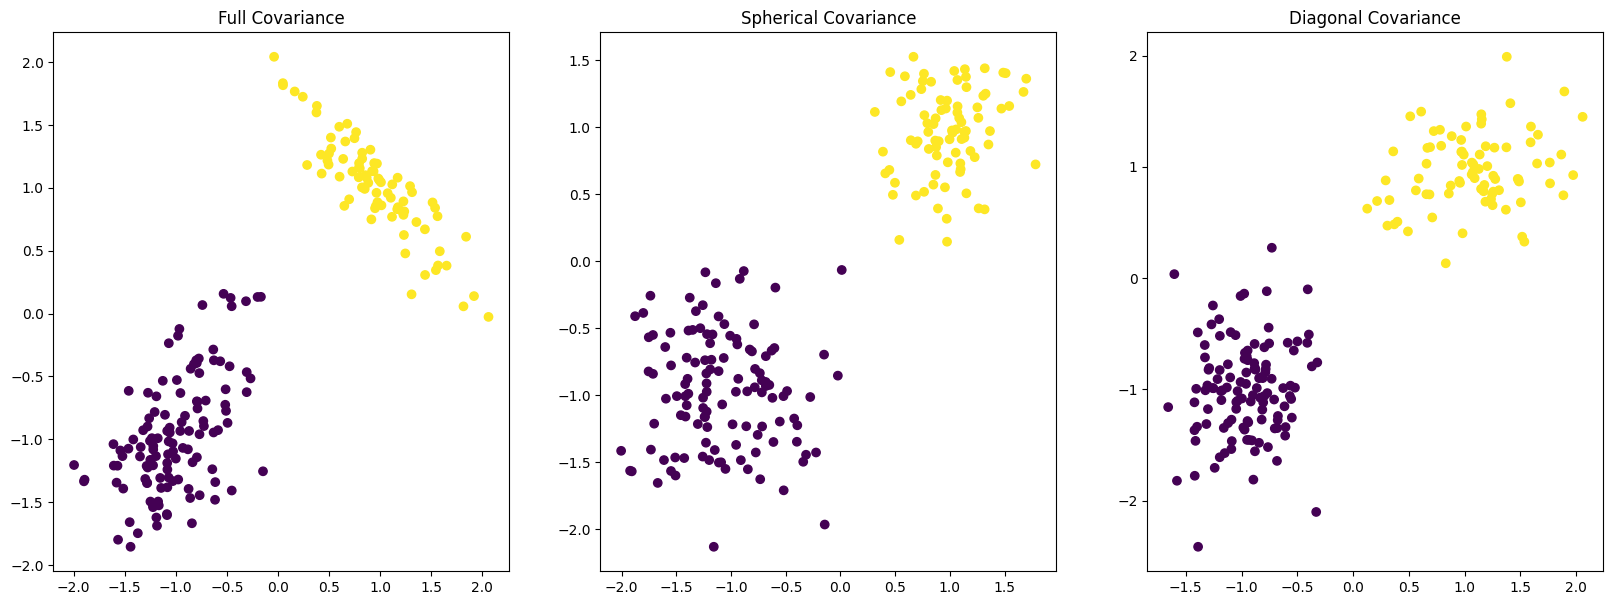

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions
    data = []
    labels = []
    for _ in range(N):
        # Select Gaussian based on pi probabilities
        selected_gaussian = np.random.choice(len(pi), p=pi)
        # Sample data from selected Gaussian
        sample = np.random.multivariate_normal(mu[selected_gaussian], sigma[selected_gaussian])
        data.append(sample)
        labels.append(selected_gaussian)
    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = [-1.0,-1.0]   #Mean vector of component1 in GMM
sig1 =[[0.15,0.1],[0.1,0.25]]  #Full covariance matrix of component1 in GMM
mu2 =[1.0,1.0]    #Mean vector of component2 in GMM
sig2 = [[0.3,-0.25],[-0.25,0.25]]  #Full covariance matrix of component2 in GMM
pi = [0.6,0.4]    #Prior probabilities

n_points =200  #Number of points

# Spherical covariances
sig1_s =[[0.2,0],[0,0.2]]
sig2_s =[[0.1,0],[0,0.1]]
# Diagonal covariances
sig1_d =[[0.1,0],[0,0.2]]
sig2_d =[[0.2,0],[0,0.1]]

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='viridis')
ax[0].set_title('Full Covariance')

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='viridis')
ax[1].set_title('Spherical Covariance')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='viridis')
ax[2].set_title('Diagonal Covariance')

plt.show()


<ipython-input-11-420a40962fc1>:76: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, rv.pdf(pos), alpha=0.5, colors=colors[k], label=f'Gaussian {k+1}')


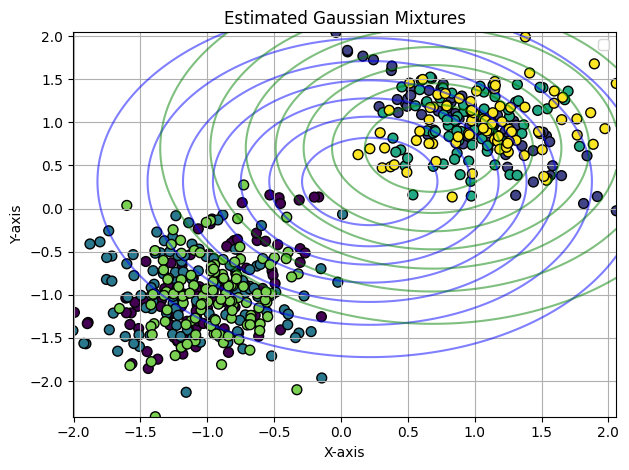

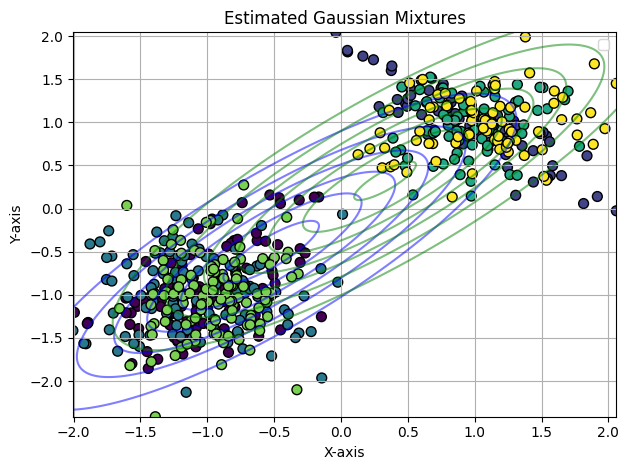

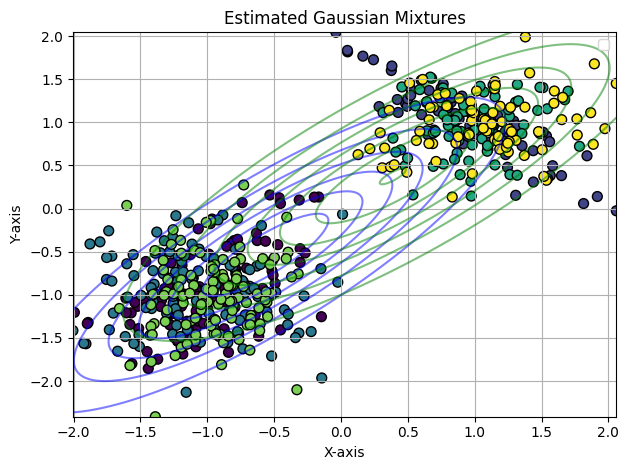

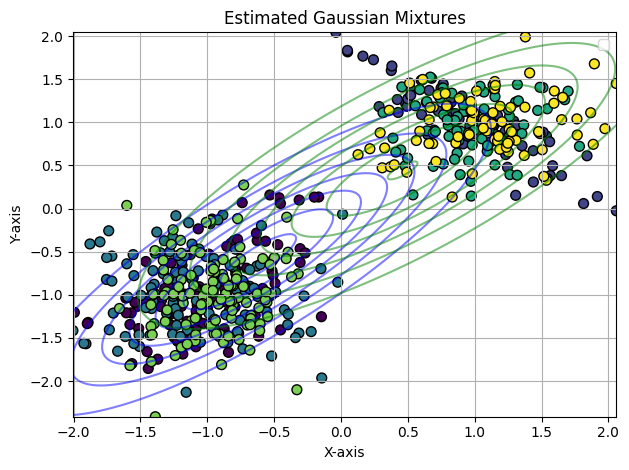

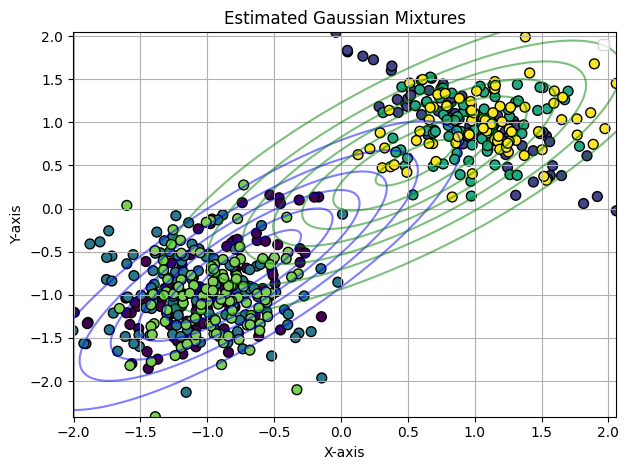

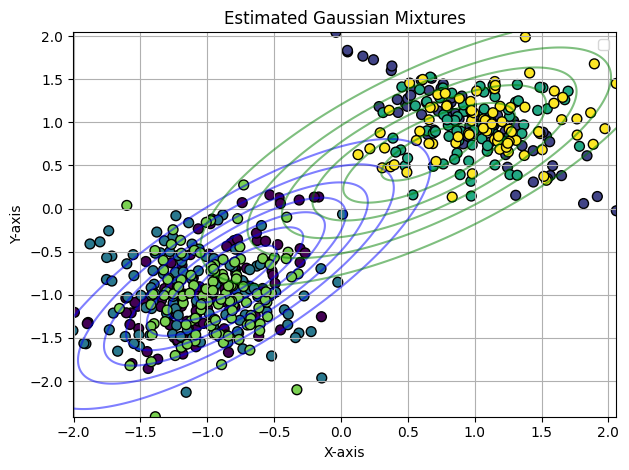

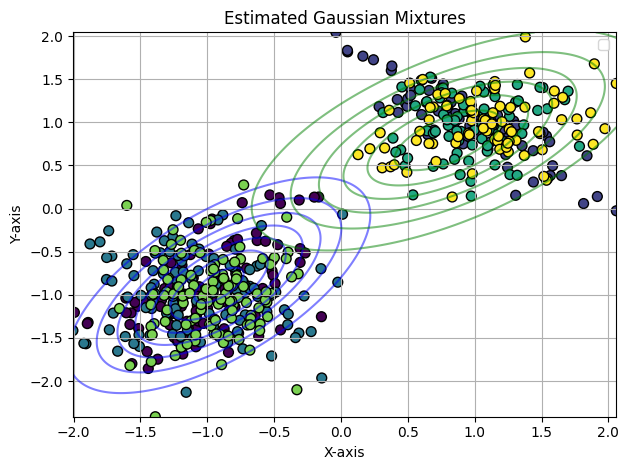

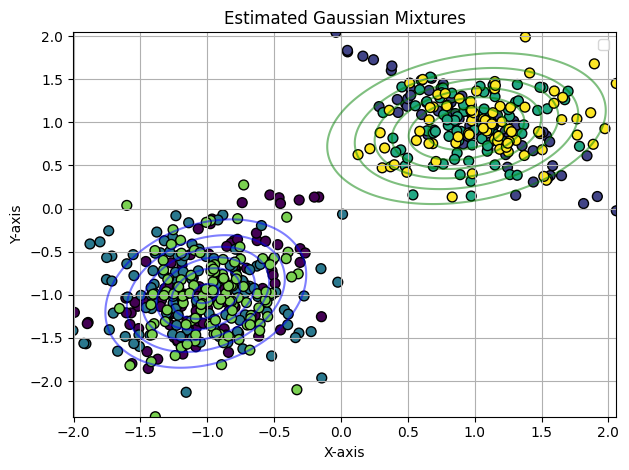

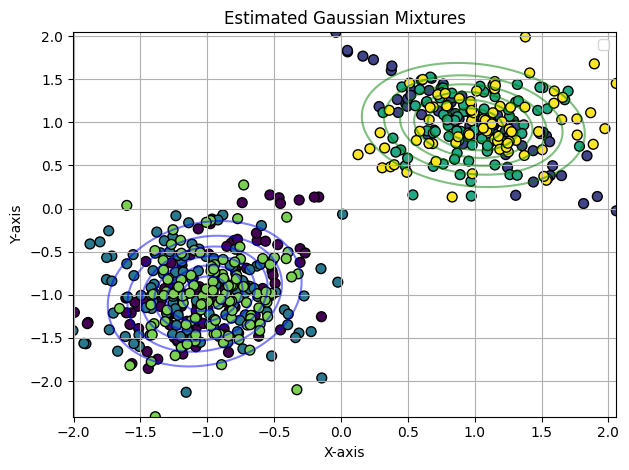

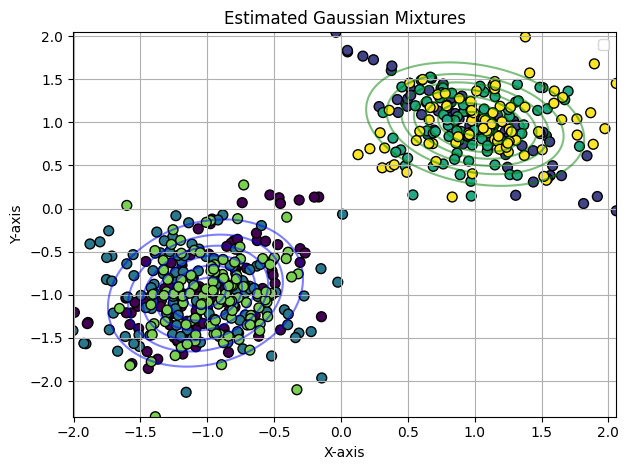

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
  #Inputs: data, parameters of GMM model
  #Outputs: likelihood
  ll = 0
  for n in range(len(data)):
      s = 0
      for k in range(len(pi)):
          s += pi[k] * multivariate_normal.pdf(data[n], mu[k], sigma[k])
      ll += np.log(s)
  return ll
############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
  #Inputs: data, parameters of GMM model
  #Outputs: gamma
  gamma = np.zeros((len(data), len(pi)))
  for n in range(len(data)):
    #Iterate through the data points
    for k in range(len(pi)):
      #Iterate through the components in GMM
      gamma[n,k] = pi[k]*multivariate_normal.pdf(data[n], mu[k], sigma[k])
    gamma[n,:] /= gamma[n,:].sum()
  return gamma



############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
  #Inputs: data, gamma
  #Outputs: Updated parameters of GMM model
  Nk = gamma.sum(axis=0)
  #Update mu
  mu = [(gamma[:,k].reshape(-1,1)*data).sum(axis=0)/Nk[k] for k in range(gamma.shape[1])]
  #Update sigma
  sigma = [((gamma[:,k].reshape(-1,1)*(data-mu[k])).T @ (data-mu[k]))/Nk[k] for k in range(gamma.shape[1])]
  #Update pi
  pi = Nk/len(data)
  #Return the parameters of GMM model
  return pi, mu, sigma


#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):
    x_max, y_max = data.max(axis=0)
    x_min, y_min = data.min(axis=0)
    x = np.linspace(x_min, x_max, 500)
    y = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x, y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    colors = ['blue', 'green']
    for k in range(len(pi)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(X, Y, rv.pdf(pos), alpha=0.5, colors=colors[k], label=f'Gaussian {k+1}')

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, edgecolors='black')
    plt.title('Estimated Gaussian Mixtures')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Explicitly specify the location of the legend
    plt.legend(loc='upper right')

    plt.grid(True)
    plt.tight_layout()
    plt.show()



############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data = np.concatenate((data_full, data_sp, data_dg))    #data to run EM-algorithm
labels = np.concatenate((labels_full, labels_sp+2, labels_dg+4))  #labels
N = data.shape[0]     #number of input examples
D = data.shape[1]     #data dimension
M =  2     #no.of components in GMM

pi =  [0.5,0.5]     #Initialize the prior probabilities
mu =  [np.random.rand(D) for _ in range(M)]     #Initialize the mean vectors
sigma = [np.eye(D) for _ in range(M)]   #Initialize the covariance matrices


nsteps = 10  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)





In [ ]:

############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math



# Function to compute the log-likelihood of the data given the parameters
def likelihood(data, pi, mu, sigma):
    ll = 0
    for n in range(len(data)):
        s = 0
        for k in range(len(pi)):
            s += pi[k] * multivariate_normal.pdf(data[n], mu[k], sigma[k])
        ll += np.log(s)
    return ll

# Function for the expectation step
def expectation(data, pi, mu, sigma):
    N = len(data)
    M = len(pi)
    gamma = np.zeros((N, M))

    for n in range(N):
        for k in range(M):
            gamma[n, k] = pi[k] * multivariate_normal.pdf(data[n], mu[k], sigma[k])
        gamma[n] /= gamma[n].sum()

    return gamma

# Function for the maximization step
def maximization(data, gamma):
    N = len(data)
    M = gamma.shape[1]

    Nk = gamma.sum(axis=0)

    mu = np.zeros((M, data.shape[1]))
    sigma = []
    pi = Nk / N

    for k in range(M):
        mu[k] = (gamma[:, k, None] * data).sum(axis=0) / Nk[k]

        diff = data - mu[k]
        weighted_diff = gamma[:, k, None] * diff
        sigma_k = np.dot(weighted_diff.T, diff) / Nk[k]
        sigma.append(sigma_k)

    return pi, mu, sigma

# Function to plot the contours
def plot_contours(data, pi, mu, sigma, title):
    x_max, y_max = data.max(axis=0)
    x_min, y_min = data.min(axis=0)

    x = np.linspace(x_min, x_max, 500)
    y = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x, y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    colors = ['blue', 'green']
    for k in range(len(pi)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(X, Y, rv.pdf(pos), alpha=0.5, colors=colors[k], label=f'Gaussian {k+1} (μ={mu[k]}, Σ={sigma[k]})')

    plt.scatter(data[:, 0], data[:, 1], c='red', s=50, edgecolors='black', label='Data Points')
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Parameters
  # Assuming you have a file named 'data.txt' containing your data
# Assuming you have already defined and generated the synthetic datasets
# data_full, data_sp, and data_dg

N, D = data_full.shape
M = 2  # Number of components in GMM
nsteps = 10  # Number of steps to run EM algorithm

# Initialize parameters for the first dataset (data_full)
pi =  [0.5,0.5]     #Initialize the prior probabilities
mu =  [np.random.rand(D) for _ in range(M)]     #Initialize the mean vectors
sigma = [np.eye(D) for _ in range(M)]   #Initialize the covariance matrices

# Run EM algorithm for data_full
for index in range(nsteps):
    gamma = expectation(data_full, pi, mu, sigma)
    pi, mu, sigma = maximization(data_full, gamma)
    title = f'Iteration {index+1} - Initialization {i+1} for full_data'
    plot_contours(data_full, pi, mu, sigma, title)


title = 'Final Iteration - Initialization for data_full'
plot_contours(data_full, pi, mu, sigma, title)

# Initialize parameters for the second dataset (data_sp)
pi =  [0.5,0.5]     #Initialize the prior probabilities
mu =  [np.random.rand(D) for _ in range(M)]     #Initialize the mean vectors
sigma = [np.eye(D) for _ in range(M)]   #Initialize the covariance matrices

# Run EM algorithm for data_sp
for index in range(nsteps):
    gamma = expectation(data_sp, pi, mu, sigma)
    pi, mu, sigma = maximization(data_sp, gamma)
    title = f'Iteration {index+1} - Initialization {i+1} for data_sp'
    plot_contours(data_sp, pi, mu, sigma, title)

title = 'Final Iteration - Initialization for data_sp'
plot_contours(data_sp, pi, mu, sigma, title)

# Initialize parameters for the third dataset (data_dg)
pi =  [0.5,0.5]     #Initialize the prior probabilities
mu =  [np.random.rand(D) for _ in range(M)]     #Initialize the mean vectors
sigma = [np.eye(D) for _ in range(M)]   #Initialize the covariance matrices

# Run EM algorithm for data_dg
for index in range(nsteps):
    gamma = expectation(data_dg, pi, mu, sigma)
    pi, mu, sigma = maximization(data_dg, gamma)
    title = f'Iteration {index+1} - Initialization {i+1} for data_dg'
    plot_contours(data_dg, pi, mu, sigma, title)

title = 'Final Iteration - Initialization for data_dg'
plot_contours(data_dg, pi, mu, sigma, title)










<b> Report your observations </b>

1.EM Algorithm Implementation:

The EM algorithm effectively estimates the parameters of the Gaussian Mixture Model from the synthetic data.
The iterative nature of the algorithm, involving expectation and maximization steps, ensures continuous refinement of the parameter estimates.
Convergence of the algorithm is critical, and monitoring the log-likelihood values provides insights into the progression of the algorithm towards optimal parameter estimates.

2.Illustration of EM Iterations:

Visual representation through contour plots offers valuable insights into the learning process of the EM algorithm.
The contour plots showcase the evolution of Gaussian distributions over iterations, capturing the underlying data distribution more accurately with each iteration.
The convergence of the contour plots towards the data clusters signifies the algorithm's ability to identify and model the underlying patterns in the data effectively.

3.Understanding Issues with EM Algorithm:

Initialization plays a pivotal role in the performance of the EM algorithm, influencing both convergence and fit quality.
The type of covariance matrix selected impacts the model's ability to capture the data distribution accurately.
Careful consideration and experimentation with different initializations and covariance types are essential to achieve optimal performance and avoid convergence issues.

4.Difference in using different covariances

as we can see
Full Covariance offers high complexity and flexibility but can overfit which is not observed here.
Spherical Covariance is simple, efficient, and robust but may underfit which can be observed in above graph.
Diagonal Covariance balances complexity and regularization, capturing variances efficiently.
